# On Recursion

## Agenda

1. Recursion
    - stopping recursion: simplification & base cases
2. Recursive "shapes":
    - Linear (single) recursion:
        - Summation
        - Factorial
        - Binary search
    - Tree (multiple) recursion: *divide and conquer*
        - Fibonacci sequence
        - Tower of Hanoi
        - Merge sort
        - Making change
3. The Call Stack and Stack Frames
    - simulating recursion
    - debugging with `pdb` and `%debug`

## 1. Recursion

Recursive functions, directly or indirectly, call themselves. 

Recursive solutions are applicable when a problem can be broken down into more easily solved sub-problems that resemble the original, and whose solutions can then be combined.

E.g., computing the combined price of a bunch of nested shopping bags of items:

In [ ]:
class Bag:
    def __init__(self, price, *contents):
        self.price = price
        self.contents = contents

In [ ]:
bag1 = Bag(10)

In [ ]:
bag2 = Bag(5, Bag(3), Bag(7))

In [ ]:
bag3 = Bag(5, Bag(4, Bag(3)), Bag(2))

In [ ]:
bag4 = Bag(0, Bag(5), Bag(10), Bag(3, Bag(2), Bag(100)), Bag(9, Bag(2, Bag(25))))

In [ ]:
def price(bag):
    return bag.price

In [ ]:
price(bag1)

### Stopping recursion: simplification & base case(s)

In [ ]:
import sys
sys.setrecursionlimit(200)

In [ ]:
def silly_rec(n):
    # print(n)
    silly_rec(n)

In [ ]:
silly_rec(10)

## 2. Recursive "shapes"

### Linear recursion

#### Example: Sum (of input ≥ 0)

$sum(n) = \begin{cases}
        0 & \text{if}\ n=0 \\
        n + sum(n-1) & \text{if}\ n>0
      \end{cases}$


E.g., 

$
\begin{align}
sum(5) & = 5 + sum(4)\\
       & = 5 + 4 + sum(3)\\
       & = 5 + 4 + 3 + sum(2)\\
       & = 5 + 4 + 3 + 2 + sum(1)\\
       & = 5 + 4 + 3 + 2 + 1 + sum(0)\\
       & = 5 + 4 + 3 + 2 + 1 + 0
\end{align}
$

In [5]:
def sum(n):
    if n == 0:
        return 0
    else:
        return n + sum(n-1)
    # u need to write return bc it'll act like a chain n have previous cases to use to get the new answer

In [6]:
sum(5)

15

#### Example: Factorial

$n! = \begin{cases}
        1 & \text{if}\ n=0 \\
        n \cdot (n-1)! & \text{if}\ n>0
      \end{cases}$

In [9]:
def factorial(n):
    if n == 0:
        return 1 #base case with no recursive call
    else: 
        return n * factorial(n-1) #a recursive call to make progress to base case

In [8]:
factorial(5)

120

#### Example: Binary search

In [18]:
def bin_search(x, lst): #O(log N)
    #print(lst)
    if len(lst) == 0:
        return False
    else: 
        mid = len(lst) // 2
        if lst[mid] == x:
            return True
        elif lst[mid] < x:
            return bin_search(x, lst[mid+1:])
        else:
            return bin_search(x, lst[:mid])

In [19]:
bin_search(25, list(range(100)))

True

In [20]:
bin_search(99, list(range(100)))

True

In [21]:
bin_search(100, list(range(100)))

False

### Tree recursion

#### Example: Fibonacci numbers

$fib(n) = \begin{cases}
            0 & \text{if}\ n=0 \\
            1 & \text{if}\ n=1 \\
            fib(n-1) + fib(n-2) & \text{otherwise}
          \end{cases}$
          
i.e., 0, 1, 1, 2, 3, 5, 8, 13, 21, ...

In [32]:
def fib(n): #O(2^N) # a better way to implement fib is iteratively 
    #print('n = ', n)
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else: #we're calling fib twice recursively
        return fib(n-1) + fib(n-2)

In [33]:
fib(5)

5

#### Example: Tower of Hanoi

Setup: three rods, with one or more discs of different sizes all stacked on one rod, smallest (top) to largest (bottom). E.g.,

         ||          ||          ||     
         ==          ||          ||     
        ====         ||          ||     
       ======        ||          ||     
    ------------------------------------
    
Goal: move all the discs, one by one, to another rod, with the rules being that (1) only smaller discs can be stacked on larger ones and (2) only the top disc in a stack can be moved to another rod.

For three discs, as shown above, we would carry out the following sequence to move the stack to the rightmost rod. The rods are abbreviated L (left), M (middle), R (right):
1. Move the small disc (0) from L to R
2. Move the medium disc (1) from L to M
3. Move 0 from R to M (R is empty)
4. Move the large disc (2) from L to R
5. Move 0 from M to L
6. Move 1 from M to R
7. Move 0 from L to R (done)

Can you come up with the sequence needed to move a stack of 4 discs from one rod to another? 5 discs? An arbitrary number of discs?

In [34]:
height = 3
towers = [[] for _ in range(3)]
towers[0] = list(range(height, 0, -1))

In [35]:
towers

[[3, 2, 1], [], []]

In [36]:
from time import sleep
from IPython.display import clear_output

def display():
    clear_output(True)
    print('{:^12}'.format('||') * 3)
    for level in range(height, 0, -1):
        for t in towers:
            try:
                print('{:^12}'.format('==' * t[level-1]), end='')
            except IndexError:
                print('{:^12}'.format('||'), end='')
        print()
    print('-' * 36)
    sleep(1)

In [37]:
display()

     ||          ||          ||     
     ==          ||          ||     
    ====         ||          ||     
   ======        ||          ||     
------------------------------------


In [38]:
def move(frm, to):
    towers[to].append(towers[frm].pop(-1))
    display()

In [39]:
move(0, 2)

     ||          ||          ||     
     ||          ||          ||     
    ====         ||          ||     
   ======        ||          ==     
------------------------------------


In [40]:
def hanoi(frm, to, using, levels):
    if levels == 1:
        move(frm, to)
    else:
        hanoi(frm, using, to, levels-1)
        move(frm, to)
        hanoi(using, to, frm, levels-1)

In [41]:
height = 4
towers = [[] for _ in range(3)]
towers[0] = list(range(height, 0, -1))

hanoi(0, 2, 1, height)

     ||          ||          ||     
     ||          ||          ==     
     ||          ||         ====    
     ||          ||        ======   
     ||          ||       ========  
------------------------------------


#### Example: Mergesort

In [42]:
def merge(l1, l2): # O(N), where N is the number of elements in the two lists
    merged = []
    i1 = i2 = 0
    while i1 < len(l1) or i2 < len(l2):
        if i2 == len(l2) or (i1 < len(l1) 
                             and l1[i1] < l2[i2]):
            merged.append(l1[i1])
            i1 += 1
        else:
            merged.append(l2[i2])
            i2 += 1
    return merged

In [43]:
l1 = [1, 5, 9]
l2 = [2, 6, 8, 11]
merge(l1, l2)

[1, 2, 5, 6, 8, 9, 11]

In [70]:
def mergesort(lst): #O(N log N)
    if len(lst) <= 1:
        return lst
    else: 
        mid = len(lst) // 2
        l1 = mergesort(lst[:mid])
        l2 = mergesort(lst[mid:])
        #print(l1, l2)
        return merge(l1, l2)

In [71]:
import random
lst = list(range(20))
random.shuffle(lst)
lst

[16, 7, 19, 6, 17, 1, 18, 11, 14, 2, 12, 0, 13, 5, 15, 4, 9, 8, 10, 3]

In [72]:
mergesort(lst)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [73]:
def insertion_sort(lst):
    for i in range(1, len(lst)):
        for j in range(i, 0, -1):
            if lst[j-1] > lst[j]:
                lst[j-1], lst[j] = lst[j], lst[j-1] # swap
            else:
                break   

In [74]:
def heapsort(iterable):
    heap = Heap()
    for x in iterable: #O(N log N)
        heap.add(x)
        
    sorted_lst = []
    while heap:     #O(N log N)
        sorted_lst.append(heap.pop_max())
    sorted_lst.reverse()
    return sorted_lst

class Heap:
    def __init__(self):
        self.data = []
    
    @staticmethod
    def _parent(idx):
        return (idx - 1) // 2
    
    @staticmethod
    def _left(idx):
        return idx*2 + 1
    
    @staticmethod
    def _right(idx):
        return idx*2 + 2

    def add(self, x):
        self.data.append(x) # O(1)
        i = len(self.data) - 1
        while i > 0:
            p = Heap._parent(i)
            if self.data[i] > self.data[p]:
                self.data[i], self.data[p] = self.data[p], self.data[i]
                i = p
            else:
                break
    
    def max(self):
        return self.data[0]

    def pop_max(self):
        m = self.data[0]
        self.data[0] = self.data[-1]
        del self.data[-1]
        i = 0
        while i < len(self.data):
            l = Heap._left(i)
            r = Heap._right(i)
            mi = i
            if l < len(self.data) and self.data[l] > self.data[i]:
                mi = l
            if r < len(self.data) and self.data[r] > self.data[mi]:
                mi = r
            if mi != i:
                self.data[i], self.data[mi] = self.data[mi], self.data[i]
                i = mi
            else:
                break
        return m
    
    def __bool__(self):
        return len(self.data) > 0

    def __len__(self):
        return len(self.data)

In [76]:
import timeit
import random
insertionsort_times = []
heapsort_times = []
mergesort_times = []
for size in range(100, 3000, 100):
    insertionsort_times.append(timeit.timeit(stmt='insertion_sort(lst)',
                               setup='import random ; from __main__ import insertion_sort ; '
                                         'lst = list(range({}))'.format(size),
                               number=1))
    heapsort_times.append(timeit.timeit(stmt='heapsort(lst)',
                               setup='import random ; from __main__ import heapsort ; '
                                         'lst = list(range({}))'.format(size),
                               number=1))
    mergesort_times.append(timeit.timeit(stmt='mergesort(lst)'.format(size),
                               setup='import random ; from __main__ import mergesort ; '
                                         'lst = list(range({}))'.format(size),
                               number=1))

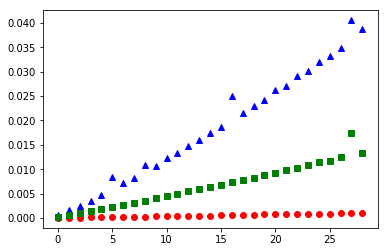

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(insertionsort_times, 'ro')
plt.plot(heapsort_times, 'b^')
plt.plot(mergesort_times, 'gs');

#### Example: Making Change

Question: how many different ways are there of making up a specified amount of money, given a list of available denominations?

E.g., how many ways of making 10 cents, given 1c, 5c, 10c, 25c coins?

In [12]:
def change(amount, denoms, ways=()):
    if amount == 0:
        return 1
    elif amount < 0 or not denoms:
        return 0
    else:
        return change(amount - denoms[0], denoms) + change(amount, denoms[1:])

In [13]:
change(5, (1, 5, 10, 25))

2

In [14]:
change(10, (1, 5, 10, 25))

4

In [15]:
change(100, (1, 5, 10, 25, 50))

292

In [20]:
def change(amount, denoms, ways=()):
    if amount == 0:
        print(ways)
        return 1
    elif amount < 0 or not denoms:
        return 0
    else:
        return change(amount - denoms[0], denoms, ways + (denoms[0],)) + change(amount, denoms[1:], ways)

In [21]:
change(25, (1, 5, 10, 25))

(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)
(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5)
(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5)
(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10)
(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5)
(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 10)
(1, 1, 1, 1, 1, 5, 5, 5, 5)
(1, 1, 1, 1, 1, 5, 5, 10)
(1, 1, 1, 1, 1, 10, 10)
(5, 5, 5, 5, 5)
(5, 5, 5, 10)
(5, 10, 10)
(25,)


13

In [26]:
def change(amount, denoms, ways=()):
    if amount == 0:
        return [()]
    elif amount < 0 or not denoms:
        return []
    else:
        return ([w+(denoms[0],) for w in change(amount - denoms[0], denoms)] 
                + change(amount, denoms[1:]))

In [27]:
ways = change(25, (1, 5, 10, 25))
ways

[(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1),
 (5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1),
 (5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1),
 (10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1),
 (5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1),
 (10, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1),
 (5, 5, 5, 5, 1, 1, 1, 1, 1),
 (10, 5, 5, 1, 1, 1, 1, 1),
 (10, 10, 1, 1, 1, 1, 1),
 (5, 5, 5, 5, 5),
 (10, 5, 5, 5),
 (10, 10, 5),
 (25,)]

## 3. The Call Stack

The *call stack* (aka. execution stack, run-time stack, etc.) is an instance of the stack data structure used to keep track of the state of active function calls in a running program. Each active function is allocated a *frame* on the stack, which contains information about the parameters, local variables, return values, and *return address* of that function.

E.g., consider how a call stack would be used to carry out the function call `foo(2, 3)`, where `foo` is defined below.

In [30]:
def foo(x, y):
    z = x + y
    z += bar(x) #pass along the value of x to a new variable, xx
    z += baz(y)
    return z

def bar(xx): #same value as x, but it's a new variable 
    z =  2 * xx
    return z

def baz(yy):
    z = yy ** 2
    return z

In [31]:
foo(2, 3)

18

### Simulating a call to recursive `factorial`

In [33]:
class Stack(list):
    push  = list.append
    pop   = lambda self: list.pop(self, -1)
    peek  = lambda self: self[-1]
    empty = lambda self: len(self) == 0

In [34]:
call_stack = Stack()

def call(arg):
    call_stack.push('<frame begin>')
    call_stack.push(('arg', arg))

def get_arg():
    return call_stack.peek()[-1]

def save_local(name, val):
    call_stack.push(('local', name, val))
    
def restore_local():
    return call_stack.pop()[2]
    
def return_with(val):
    while call_stack.pop() != '<frame begin>':
        pass
    call_stack.push(('ret', val))
    
def last_return_val():
    return call_stack.pop()[-1]

In [35]:
call(10) # initial call
while True: # recursive calls
    n = get_arg()
    if n == 1:
        return_with(1)
        break
    else:
        save_local('n', n)
        call(n-1)

In [36]:
call_stack

['<frame begin>',
 ('arg', 10),
 ('local', 'n', 10),
 '<frame begin>',
 ('arg', 9),
 ('local', 'n', 9),
 '<frame begin>',
 ('arg', 8),
 ('local', 'n', 8),
 '<frame begin>',
 ('arg', 7),
 ('local', 'n', 7),
 '<frame begin>',
 ('arg', 6),
 ('local', 'n', 6),
 '<frame begin>',
 ('arg', 5),
 ('local', 'n', 5),
 '<frame begin>',
 ('arg', 4),
 ('local', 'n', 4),
 '<frame begin>',
 ('arg', 3),
 ('local', 'n', 3),
 '<frame begin>',
 ('arg', 2),
 ('local', 'n', 2),
 ('ret', 1)]

In [45]:
ret = last_return_val()
n = restore_local()
return_with(n * ret)
call_stack

[('ret', 3628800)]

### Examining the call stack with `pdb` and `%debug`

In [46]:
def factorial(n):
    if n <= 1:
        raise Exception('base case!')
    else:
        return n * factorial(n-1)

In [47]:
factorial(10)

Exception: base case!

In [ ]:
%debug
# commands to try:
# help, where, args, p n, up, u 10, down, d 10, l, up 100, u, d (& enter to repeat)

> <ipython-input-46-195127ff2ebe>(3)factorial()
      1 def factorial(n):
      2     if n <= 1:
----> 3         raise Exception('base case!')
      4     else:
      5         return n * factorial(n-1)

ipdb> 


In [ ]:
def bin_search(x, lst):
    if len(lst) == 0:
        return False
    else:
        mid = len(lst) // 2
        if lst[mid] < x:
            return bin_search(x, lst[mid+1:])
        elif lst[mid] > x:
            return bin_search(x, lst[:mid])
        else:
            import pdb ; pdb.set_trace() # <-- start debugging here
            return True    

In [ ]:
bin_search(20, list(range(100)))